<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Encoding/TargetGuidedOrdinalEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.3 MB/s 


In [5]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/houseprice/houseprice.csv'
data = pd.read_csv(path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
sel_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

In [7]:
data = data[sel_cols]

In [8]:
data.nunique()

Neighborhood     25
Exterior1st      15
Exterior2nd      16
SalePrice       663
dtype: int64

In [9]:
X = data.drop('SalePrice', axis =1)
y = data['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

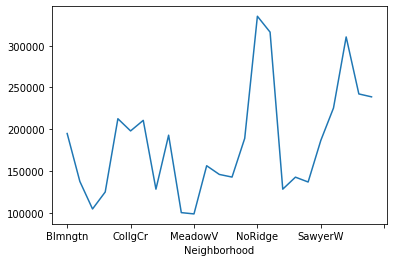

In [22]:
data.groupby(['Neighborhood'])['SalePrice'].mean().plot()
plt.show()

In [12]:
from feature_engine.encoding import OrdinalEncoder

In [13]:
tgt_guid_enc = OrdinalEncoder(encoding_method='ordered')

In [14]:
tgt_guid_enc.fit(X_train,y_train)

OrdinalEncoder()

In [24]:
tgt_guid_enc.transform(X_train)

,Neighborhood,Exterior1st,Exterior2nd
318,24,8,10
239,4,11,12
986,5,11,12
1416,5,11,2
390,4,5,6
...,...,...,...
802,15,6,7
53,20,6,7
350,23,5,6
79,5,4,5


In [25]:
X_train = tgt_guid_enc.transform(X_train)
X_test = tgt_guid_enc.transform(X_test)

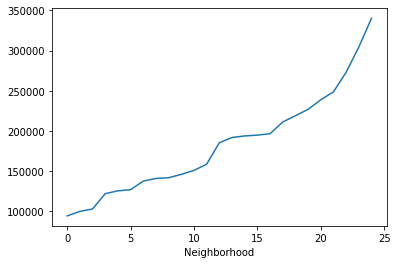

In [28]:
pd.concat([X_train,y_train], axis =1).groupby(['Neighborhood'])['SalePrice'].mean().plot()
plt.show()